# Projects

Repository metrics that reflect how we are doing with respect to the standard components of integration with GitLab (badges/tests), and ReadTheDocs.

In [1]:
# include common code and config
# selected_pi = 14
%run PIQM_Bootstrap.ipynb

{'pi': 'PI14', 'id': 14, 'start': '2022-03-16T00:00:00Z', 'started': '2022-03-16', 'finish': '2022-06-18T23:59:59Z'}


In [2]:
query_api = client.query_api()
df_projects = query_api.query_data_frame(
    """from(bucket: "gitlab_metrics")
  |> range(start: 2008-03-17T00:00:00Z, stop: {0[finish]})
  |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_pipeline_duration")
  |> drop(columns:["pipeline_last_run_status", "_measurement", "license", "_field"])
  """.format(current_pi))

df_projects


result  table                    _start                     _stop  \
0    _result      0 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
1    _result      1 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
2    _result      2 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
3    _result      3 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
4    _result      4 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
..       ...    ...                       ...                       ...   
255  _result    255 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
256  _result    256 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
257  _result    257 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
258  _result    258 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   
259  _result    259 2008-03-17 00:00:00+00:00 2022-06-18 23:59:59+00:00   

                               _time  _value got_coverage got_linting got_rtd  \
0   2019-06-12 19:40:49.861000+00:00  2736.0            0           0       0   
1   2019-07-18 08:47:30.836000+00:00   241.0            0           0       0   
2   2019-07-29 06:13:06.162000+00:00     0.0            0           0       0   
3   2019-09-16 15:28:30.116000+00:00   518.0            0           0       0   
4   2019-10-29 19:11:41.773000+00:00     0.0            0           0       0   
..                               ...     ...          ...         ...     ...   
255 2022-03-23 09:22:30.522000+00:00   382.0            1           1       1   
256 2022-03-31 09:03:43.710000+00:00     0.0            1           1       1   
257 2022-03-31 09:27:03.023000+00:00   841.0            1           1       1   
258 2018-10-24 08:40:54.932000+00:00  1869.0            1           1       1   
259 2018-11-29 08:22:28.969000+00:00  2195.0            1           1       1   

    got_tests        id                                     project  
0           0  12828461         ska-telescope/sdp/ska-sdp-par-model  
1           0  13372840       ska-telescope/ska-cicd-cpp-build-base  
2           0  13540781    ska-telescope/templates/ska-cpp-template  
3           0  14333804                   ska-telescope/sdc/ska-sdc  
4           0  15077844            ska-telescope/CUDA_Deconvolution  
..        ...       ...                                         ...  
255         1  34728004   ska-telescope/ska-tmc/ska-tmc-integration  
256         1  34960109  ska-telescope/ska-tmc/ska-tmc-cspleafnodes  
257         1  34961124  ska-telescope/ska-tmc/ska-tmc-dishleafnode  
258         1   9027158              ska-telescope/ska-tango-images  
259         1   9673989            ska-telescope/ska-tango-examples  

[260 rows x 12 columns]

In [3]:
pis = the_pis.copy()
current = pis.pop(-1)
pi_list = ([current] + pis[: (selected_pi - select_pis) : -1])[::-1]

template_project_trace = """

{0[pi]} = from(bucket: "gitlab_metrics")
  |> range(start: {0[start]}, stop: {0[finish]})
  |> filter(fn: (r) => r._measurement == "projects" and r._field == "last_pipeline_duration")
  |> drop(columns:["pipeline_last_run_status", "_measurement", "license", "_field"])
  |> set(key: "ID",value: "{0[id]}")
  |> set(key: "PI",value: "{0[pi]} ({0[started]})")
"""

# output all the series in reverse order
query = []
tables = ", ".join([pi["pi"] for pi in pi_list])
for pi in pi_list:
#     pi["current_start"] = last_start
    query.append(template_project_trace.format(pi))
query.append("""
union(tables: [{}])
  |> group()
  |> yield(name: "projects")
""".format(
        tables
    )
)
query = "\n".join(query)

# print(query)

query_api = client.query_api()

projects = query_api.query_data_frame(query)
# mrs = mrs[["_value", "_field"]]\
#     .rename(columns={"_value": "Merge Requests", "_field": "PI"})
projects['ID'] = projects['ID'].astype(int)
projects.sort_values(by=['ID', '_time'], ascending=[True, True], inplace=True)
projects

result  table                    _start                     _stop  \
13   projects      0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
14   projects      0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
9    projects      0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
0    projects      0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
1    projects      0 2021-03-17 00:00:00+00:00 2021-06-15 23:59:59+00:00   
..        ...    ...                       ...                       ...   
93   projects      0 2022-03-16 00:00:00+00:00 2022-06-18 23:59:59+00:00   
102  projects      0 2022-03-16 00:00:00+00:00 2022-06-18 23:59:59+00:00   
94   projects      0 2022-03-16 00:00:00+00:00 2022-06-18 23:59:59+00:00   
95   projects      0 2022-03-16 00:00:00+00:00 2022-06-18 23:59:59+00:00   
96   projects      0 2022-03-16 00:00:00+00:00 2022-06-18 23:59:59+00:00   

                               _time  _value got_coverage got_linting got_rtd  \
13  2021-04-01 11:15:39.828000+00:00   688.0            1           1       1   
14  2021-04-01 18:58:51.857000+00:00   927.0            1           1       1   
9   2021-04-01 19:01:06.455000+00:00   862.0            1           1       0   
0   2021-04-08 08:02:16.774000+00:00     0.0            0           0       0   
1   2021-04-15 14:45:58.338000+00:00     0.0            0           0       0   
..                               ...     ...          ...         ...     ...   
93  2022-04-21 06:29:59.432000+00:00     0.0            0           0       0   
102 2022-04-21 12:47:23.524000+00:00   628.0            1           1       0   
94  2022-04-27 01:59:26.435000+00:00     0.0            0           0       0   
95  2022-04-28 09:38:42.842000+00:00     0.0            0           0       0   
96  2022-04-28 23:36:30.465000+00:00    66.0            0           0       0   

    got_tests        id                                           project  ID  \
13          1  25578388                     ska-telescope/ska-csp-lmc-mid  10   
14          1  25588125                  ska-telescope/ska-csp-lmc-common  10   
9           1  25588162                     ska-telescope/ska-csp-lmc-low  10   
0           0  25733838        ska-telescope/sim/ska-low-station-behavior  10   
1           0  25916743                        ska-telescope/ska-usecases  10   
..        ...       ...                                               ...  ..   
93          0  35530855  ska-telescope/templates/ska-ser-sphinx-templates  14   
102         1  35542125             ska-telescope/sdp/ska-sdp-func-radler  14   
94          0  35682489             ska-telescope/k8s-ghost-device-plugin  14   
95          0  35730574           ska-telescope/sdi/ska-cicd-oci-scanning  14   
96          0  35749515     ska-telescope/sdi/ska-cicd-nexus-conan-search  14   

                    PI  
13   PI10 (2021-03-17)  
14   PI10 (2021-03-17)  
9    PI10 (2021-03-17)  
0    PI10 (2021-03-17)  
1    PI10 (2021-03-17)  
..                 ...  
93   PI14 (2022-03-16)  
102  PI14 (2022-03-16)  
94   PI14 (2022-03-16)  
95   PI14 (2022-03-16)  
96   PI14 (2022-03-16)  

[108 rows x 14 columns]

In [4]:
# total projects
project_stats = projects[['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()
project_stats.sort_values(by=['ID'], ascending=[True], inplace=True)
project_stats['total'] = project_stats['id']['count']
del project_stats['id']

# projects with rtd
project_stats['rtd'] = projects[projects.got_rtd == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with coverage
project_stats['coverage'] = projects[projects.got_coverage == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with linting
project_stats['linting'] = projects[projects.got_linting == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

# projects with tests
project_stats['tests'] = projects[projects.got_tests == "1"][['ID', 'PI', 'id']].groupby(['ID', 'PI']).agg(['count', 'size', 'nunique']).reset_index()['id']['count']

project_stats


ID                 PI total rtd coverage linting tests
                                                         
0  10  PI10 (2021-03-17)    17   4        8       8     8
1  11  PI11 (2021-06-16)    15   4        6       6     6
2  12  PI12 (2021-09-16)    25   3        8       8     8
3  13  PI13 (2021-12-17)    27   4       11      11    11
4  14  PI14 (2022-03-16)    24   6       10      10    10

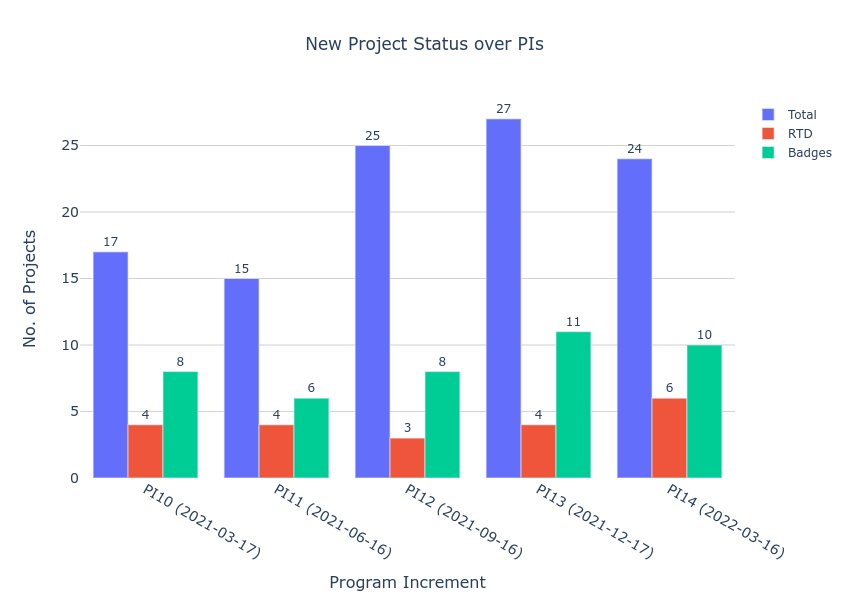

In [5]:
import plotly.graph_objects as go
stack_labels = ['{:.0f}'.format(x) for x in project_stats['total']]

fig = go.Figure(data=[go.Bar(x=project_stats.PI, y=project_stats['total'], name='Total',
     text=['{:.0f}'.format(x) for x in project_stats['total']]),
             go.Bar(x=project_stats.PI, y=project_stats['rtd'], name='RTD',
     text=['{:.0f}'.format(x) for x in project_stats['rtd']]),
             go.Bar(x=project_stats.PI, y=project_stats['linting'], name='Badges',
     text=['{:.0f}'.format(x) for x in project_stats['linting']]),         
                     ])
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_traces( textposition='outside')
fig.update_layout(barmode='group', yaxis=dict(
        title='No. of Projects',
        titlefont_size=16,
        tickfont_size=14,
    ), xaxis=dict(
        title='Program Increment',
        titlefont_size=16,
        tickfont_size=14,
    ), height=600, title='New Project Status over PIs', title_x=0.5, paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)')
fig.show()
